In [2]:
import pandas as pd     #import libraries
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
reviews = pd.read_excel("customer_reviews.xlsx")

In [4]:
reviews.head(3)

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.


In [5]:
reviews.ReviewText.sample(10)    #for checking review samples 

913          Great    purchase,  very  satisfied.
523                  The  quality  is  top-notch.
340                       Not  worth  the  money.
919        Customer  support  was  very  helpful.
768     Excellent  product,    highly  recommend!
204              Amazing  value  for  the  price.
891          Great  purchase,  very    satisfied.
561                       Not  worth  the  money.
202       Average  experience,  nothing  special.
1186           Great  purchase,  very  satisfied.
Name: ReviewText, dtype: object

In [6]:
reviews['ReviewText'] = reviews['ReviewText'].str.replace("  "," ")
reviews['ReviewText']                                                   #reduce space 

0        Average experience, nothing special.
1                  The quality is  top-notch.
2          Five stars for the quick delivery.
3         Good quality, but could be cheaper.
4        Average experience, nothing special.
                        ...                  
1358                     Not worth the money.
1359    Average  experience, nothing special.
1360       Customer support was very helpful.
1361    Product did not meet my expectations.
1362                The product arrived late.
Name: ReviewText, Length: 1363, dtype: object

In [7]:
import nltk     #NLP library

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
# Download the VADER lexicon for sentiment analysis if not already present.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
sia = SentimentIntensityAnalyzer()

In [11]:
def calculate_sentiment(review):
    # Get the sentiment scores for the review text
    sentiment = sia.polarity_scores(review)
    # Return the compound score, which is a normalized score between -1 (most negative) and 1 (most positive)
    return sentiment['compound']

In [12]:
# test code
review = "I absolutely at this product! It's bullshit."

# Calculate sentiment
print(calculate_sentiment(review)) 

-0.6239


In [13]:
#test
texts = [                                                                #
        "I love this product.",    #Positive  
        "this product is okay.",     #neutral
        "I dont like this product."  #negative
    
]

for text in texts:
    scores =sia.polarity_scores(text)
    print(f"text: {text}\nCompound Score: {scores['compound']}\n")

text: I love this product.
Compound Score: 0.6369

text: this product is okay.
Compound Score: 0.2263

text: I dont like this product.
Compound Score: -0.2755



In [14]:
# Apply sentiment analysis to calculate sentiment scores for each review
reviews['SentimentScore'] = reviews['ReviewText'].apply(calculate_sentiment)
reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089
...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000


In [15]:
# Define a function to categorize sentiment using both the sentiment score and the review rating
def categorize_sentiment(score, rating):
    # Use both the text sentiment score and the numerical rating to determine sentiment category
    if score > 0.05:  # Positive sentiment score
        if rating >= 4:
            return 'Positive'  # High rating and positive sentiment
        elif rating == 3:
            return 'Mixed Positive'  # Neutral rating but positive sentiment
        else:
            return 'Mixed Negative'  # Low rating but positive sentiment
    elif score < -0.05:  # Negative sentiment score
        if rating <= 2:
            return 'Negative'  # Low rating and negative sentiment
        elif rating == 3:
            return 'Mixed Negative'  # Neutral rating but negative sentiment
        else:
            return 'Mixed Positive'  # High rating but negative sentiment
    else:  # Neutral sentiment score
        if rating >= 4:
            return 'Positive'  # High rating with neutral sentiment
        elif rating <= 2:
            return 'Negative'  # Low rating with neutral sentiment
        else:
            return 'Neutral'  # Neutral rating and neutral sentiment

In [16]:
reviews['SentimentCategory'] = reviews.apply(lambda row: categorize_sentiment(row['SentimentScore'], row['Rating']), axis=1)
reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore,SentimentCategory
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089,Mixed Negative
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382,Mixed Positive
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089,Mixed Negative
...,...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695,Mixed Negative
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089,Negative
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997,Positive
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000,Negative


In [17]:
# Define a function to bucket sentiment scores into text ranges
def sentiment_bucket(score):
    if score >= 0.5:
        return '0.5 to 1.0'  # Strongly positive sentiment
    elif 0.0 <= score < 0.5:
        return '0.0 to 0.49'  # Mildly positive sentiment
    elif -0.5 <= score < 0.0:
        return '-0.49 to 0.0'  # Mildly negative sentiment
    else:
        return '-1.0 to -0.5'  # Strongly negative sentiment

In [18]:
# Apply sentiment bucketing to categorize scores into defined ranges
reviews['SentimentBucket'] = reviews['SentimentScore'].apply(sentiment_bucket)
reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore,SentimentCategory,SentimentBucket
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089,Mixed Negative,-0.49 to 0.0
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive,0.0 to 0.49
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive,0.0 to 0.49
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382,Mixed Positive,0.0 to 0.49
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089,Mixed Negative,-0.49 to 0.0
...,...,...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695,Mixed Negative,-0.49 to 0.0
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089,Negative,-0.49 to 0.0
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997,Positive,0.5 to 1.0
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000,Negative,0.0 to 0.49


In [19]:
reviews.to_csv('facts_customer_reviews_with_sentiment.csv', index=False)

In [20]:
reviews.SentimentCategory.value_counts()

SentimentCategory
Positive          840
Negative          226
Mixed Negative    196
Mixed Positive     86
Neutral            15
Name: count, dtype: int64

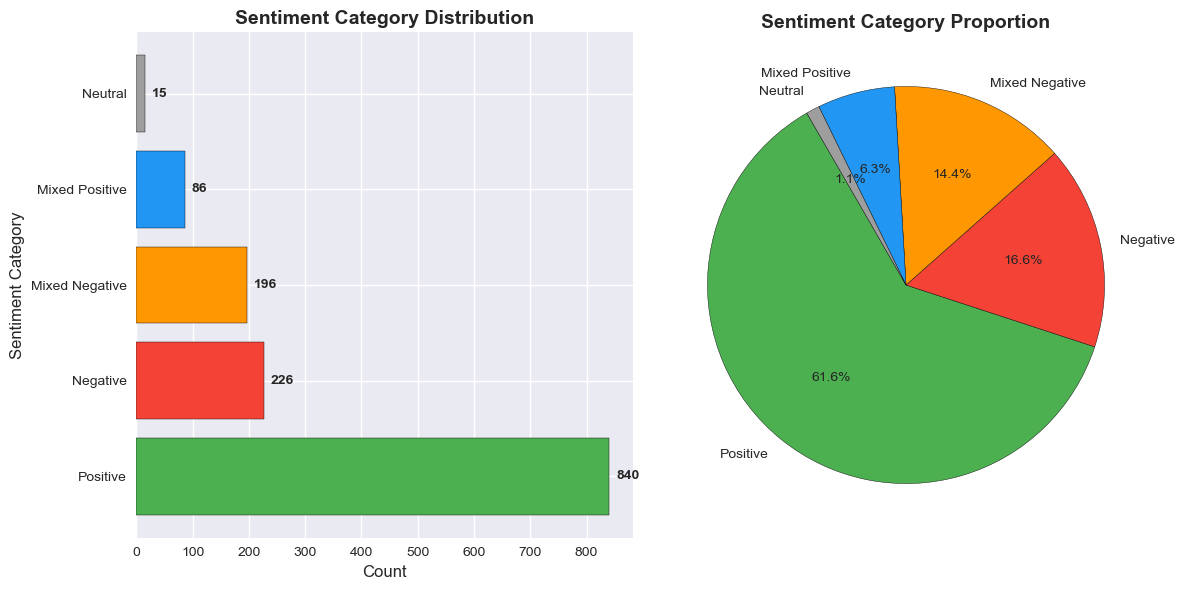

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

In [23]:
sentiments = ['Positive', 'Negative', 'Mixed Negative', 'Mixed Positive', 'Neutral']
counts = [840, 226, 196, 86, 15]
colors = ['#4CAF50', '#F44336', '#FF9800', '#2196F3', '#9E9E9E']

plt.style.use('seaborn-v0_8')  

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].barh(sentiments, counts, color=colors, edgecolor='black')
axes[0].set_title('Sentiment Category Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Sentiment Category', fontsize=12)


axes[0].bar_label(axes[0].containers[0], fmt='%d', label_type='edge', padding=5, fontweight='bold')

# Pie Chart
axes[1].pie( counts,labels=sentiments, autopct='%1.1f%%',startangle=120,colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Sentiment Category Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
plt.savefig